# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [1]:
!pip install ipywidgets --upgrade
!jupyter nbextension enable widgetsnbextension --user --py
!jupyter nbextension enable --py widgetsnbextension --sys-prefix
!jupyter nbextension install --py widgetsnbextension --user


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/d4/17/8b2ce5765dd423433d2e0727712629c46152fb0bc706b0977f847480f262/ipywidgets-8.1.3-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=4.0.11 from https://files.pythonhosted.org/packages/93/c1/68423f43bc95d873d745bef8030ecf47cd67f932f20b3f7080a02cff43ca/widgetsnbextension-4.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab-widgets~=3.0.11 from https://files.pythonhosted.org/packages/65/f6/659ca44182c86f57977e946047c339c717745fda9f43b7ac47f274e86553/jupyterlab_widgets-3.0.11-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 1.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 5.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.8 MB/s eta 0:00:00a 0:

In [2]:
# TODO: Make all necessary imports.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import json
import tensorflow_hub as hub
import os



2024-08-20 20:25:51.828302: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 20:25:51.828366: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 20:25:51.828405: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [3]:
# TODO: Load the dataset with TensorFlow Datasets.
dataset, dataset_info =tfds.load("oxford_flowers102",with_info=True,as_supervised=True)
# TODO: Create a training set, a validation set and a test set.
train_dataset=dataset['train']
val_dataset=dataset['validation']
test_datset=dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:01<?, ? url/s]
Dl Size...: 0 MiB [00:01, ? MiB/s]

Dl Completed...:  33%|███▎      | 1/3 [00:01<00:03,  1.75s/ url]
Dl Size...: 0 MiB [00:01, ? MiB/s]

Dl Completed...:  33%|███▎      | 1/3 [00:01<00:03,  1.75s/ url]
Dl Size...: 0 MiB [00:01, ? MiB/s]

Dl Completed...:  67%|██████▋   | 2/3 [00:01<00:01,  1.75s/ url]
Dl Size...: 0 MiB [00:01, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Extraction completed...: 0 file [00:01, ? file/s]
Dl Size...:   0%|          | 1/328 [00:02<13:24,  2.46s/ MiB]

Dl Size...:   1%|          | 2/328 [00:02<13:22,  2.46s/ MiB]

Dl Size...:   1%| 

Dl Size...:  17%|█▋        | 55/328 [00:04<00:26, 10.46 MiB/s]

Dl Size...:  17%|█▋        | 56/328 [00:04<00:26, 10.46 MiB/s]

Dl Size...:  17%|█▋        | 57/328 [00:04<00:25, 10.46 MiB/s]

Dl Size...:  18%|█▊        | 58/328 [00:04<00:25, 10.46 MiB/s]

Dl Size...:  18%|█▊        | 59/328 [00:04<00:25, 10.46 MiB/s]

Dl Size...:  18%|█▊        | 60/328 [00:04<00:25, 10.46 MiB/s]

Extraction completed...: 0 file [00:04, ? file/s]
Dl Size...:  19%|█▊        | 61/328 [00:04<00:15, 17.55 MiB/s]

Dl Size...:  19%|█▉        | 62/328 [00:04<00:15, 17.55 MiB/s]

Dl Size...:  19%|█▉        | 63/328 [00:04<00:15, 17.55 MiB/s]

Dl Size...:  20%|█▉        | 64/328 [00:04<00:15, 17.55 MiB/s]

Dl Size...:  20%|█▉        | 65/328 [00:04<00:14, 17.55 MiB/s]

Dl Size...:  20%|██        | 66/328 [00:04<00:14, 17.55 MiB/s]

Dl Size...:  20%|██        | 67/328 [00:04<00:14, 17.55 MiB/s]

Dl Size...:  21%|██        | 68/328 [00:04<00:14, 17.55 MiB/s]

Dl Size...:  21%|██        | 69/328 [00:04<00:14, 17.5

Dl Size...:  35%|███▌      | 116/328 [00:06<00:09, 21.53 MiB/s]

Dl Size...:  36%|███▌      | 117/328 [00:06<00:09, 21.53 MiB/s]

Dl Size...:  36%|███▌      | 118/328 [00:06<00:09, 21.53 MiB/s]

Dl Size...:  36%|███▋      | 119/328 [00:06<00:09, 21.53 MiB/s]

Dl Size...:  37%|███▋      | 120/328 [00:06<00:09, 21.53 MiB/s]

Dl Size...:  37%|███▋      | 121/328 [00:06<00:09, 21.53 MiB/s]

Extraction completed...: 0 file [00:06, ? file/s]
Dl Size...:  37%|███▋      | 122/328 [00:06<00:08, 24.16 MiB/s]

Dl Size...:  38%|███▊      | 123/328 [00:06<00:08, 24.16 MiB/s]

Dl Size...:  38%|███▊      | 124/328 [00:06<00:08, 24.16 MiB/s]

Dl Size...:  38%|███▊      | 125/328 [00:06<00:08, 24.16 MiB/s]

Dl Size...:  38%|███▊      | 126/328 [00:06<00:08, 24.16 MiB/s]

Dl Size...:  39%|███▊      | 127/328 [00:06<00:08, 24.16 MiB/s]

Dl Size...:  39%|███▉      | 128/328 [00:06<00:08, 24.16 MiB/s]

Dl Size...:  39%|███▉      | 129/328 [00:06<00:08, 24.16 MiB/s]

Dl Size...:  40%|███▉      | 130/328 [00

Dl Size...:  54%|█████▎    | 176/328 [00:08<00:05, 26.21 MiB/s]

Dl Size...:  54%|█████▍    | 177/328 [00:08<00:05, 26.21 MiB/s]

Dl Size...:  54%|█████▍    | 178/328 [00:08<00:05, 26.21 MiB/s]

Dl Size...:  55%|█████▍    | 179/328 [00:08<00:05, 26.21 MiB/s]

Dl Size...:  55%|█████▍    | 180/328 [00:08<00:05, 26.21 MiB/s]

Dl Size...:  55%|█████▌    | 181/328 [00:08<00:05, 26.21 MiB/s]

Dl Size...:  55%|█████▌    | 182/328 [00:08<00:05, 26.21 MiB/s]

Dl Size...:  56%|█████▌    | 183/328 [00:08<00:05, 26.21 MiB/s]

Extraction completed...: 0 file [00:08, ? file/s]
Dl Size...:  56%|█████▌    | 184/328 [00:08<00:05, 27.30 MiB/s]

Dl Size...:  56%|█████▋    | 185/328 [00:08<00:05, 27.30 MiB/s]

Dl Size...:  57%|█████▋    | 186/328 [00:08<00:05, 27.30 MiB/s]

Dl Size...:  57%|█████▋    | 187/328 [00:08<00:05, 27.30 MiB/s]

Dl Size...:  57%|█████▋    | 188/328 [00:08<00:05, 27.30 MiB/s]

Dl Size...:  58%|█████▊    | 189/328 [00:08<00:05, 27.30 MiB/s]

Dl Size...:  58%|█████▊    | 190/328 [00

Dl Size...:  72%|███████▏  | 237/328 [00:10<00:03, 27.94 MiB/s]

Dl Size...:  73%|███████▎  | 238/328 [00:10<00:03, 27.94 MiB/s]

Dl Size...:  73%|███████▎  | 239/328 [00:10<00:03, 27.94 MiB/s]

Dl Size...:  73%|███████▎  | 240/328 [00:10<00:03, 27.94 MiB/s]

Dl Size...:  73%|███████▎  | 241/328 [00:10<00:03, 27.94 MiB/s]

Dl Size...:  74%|███████▍  | 242/328 [00:10<00:03, 27.94 MiB/s]

Dl Size...:  74%|███████▍  | 243/328 [00:10<00:03, 27.94 MiB/s]

Dl Size...:  74%|███████▍  | 244/328 [00:10<00:03, 27.94 MiB/s]

Extraction completed...: 0 file [00:10, ? file/s]
Dl Size...:  75%|███████▍  | 245/328 [00:10<00:02, 28.53 MiB/s]

Dl Size...:  75%|███████▌  | 246/328 [00:10<00:02, 28.53 MiB/s]

Dl Size...:  75%|███████▌  | 247/328 [00:10<00:02, 28.53 MiB/s]

Dl Size...:  76%|███████▌  | 248/328 [00:10<00:02, 28.53 MiB/s]

Dl Size...:  76%|███████▌  | 249/328 [00:10<00:02, 28.53 MiB/s]

Dl Size...:  76%|███████▌  | 250/328 [00:10<00:02, 28.53 MiB/s]

Dl Size...:  77%|███████▋  | 251/328 [00

Dl Size...:  91%|█████████ | 297/328 [00:12<00:01, 29.20 MiB/s]

Dl Size...:  91%|█████████ | 298/328 [00:12<00:01, 29.20 MiB/s]

Dl Size...:  91%|█████████ | 299/328 [00:12<00:00, 29.20 MiB/s]

Dl Size...:  91%|█████████▏| 300/328 [00:12<00:00, 29.20 MiB/s]

Dl Size...:  92%|█████████▏| 301/328 [00:12<00:00, 29.20 MiB/s]

Dl Size...:  92%|█████████▏| 302/328 [00:12<00:00, 29.20 MiB/s]

Dl Size...:  92%|█████████▏| 303/328 [00:12<00:00, 29.20 MiB/s]

Dl Size...:  93%|█████████▎| 304/328 [00:12<00:00, 29.20 MiB/s]

Dl Size...:  93%|█████████▎| 305/328 [00:12<00:00, 29.20 MiB/s]

Dl Size...:  93%|█████████▎| 306/328 [00:12<00:00, 29.20 MiB/s]

Dl Size...:  94%|█████████▎| 307/328 [00:12<00:00, 29.20 MiB/s]

Extraction completed...: 0 file [00:12, ? file/s]
Dl Size...:  94%|█████████▍| 308/328 [00:12<00:00, 29.64 MiB/s]

Dl Size...:  94%|█████████▍| 309/328 [00:12<00:00, 29.64 MiB/s]

Dl Size...:  95%|█████████▍| 310/328 [00:12<00:00, 29.64 MiB/s]

Dl Size...:  95%|█████████▍| 311/328 [00

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Extraction completed...:   0%|          | 0/8189 [01:29<?, ? file/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|███

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Extraction completed...:   3%|▎         | 267/8189 [01:31<1:08:55,  1.92 file/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Extraction completed...:   7%|▋         | 538/8189 [01:33<14:03,  9.07 file/s]

Dl Size...

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Extraction completed...:  10%|▉         | 803/8189 [01:35<05:55, 20.79 file/s]

Dl Size...

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Extraction completed...:  28%|██▊       | 2264/8189 [01:46<00:49, 118.68 file/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 29.64 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Extraction completed...:  39%|███▉      | 3205/8189 [01:53<00:38, 130.76 file/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 29.64 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Extraction completed...:  42%|████▏     | 3474/8189 [01:55<00:35, 132.80 file/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 29.64 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Extraction completed...:  47%|████▋     | 3885/8189 [01:58<00:32, 132.16 file/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Extraction completed...:  61%|██████    | 5003/8189 [02:07<00:23, 136.27 file/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Extraction completed...:  76%|███████▋  | 6247/8189 [02:16<00:13, 139.03 file/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Extraction completed...:  78%|███████▊  | 6387/8189 [02:17<00:12, 139.28 file/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Extraction completed...:  83%|████████▎ | 6815/8189 [02:20<00:09, 138.02 file/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Extraction completed...:  93%|█████████▎| 7650/8189 [02:26<00:03, 136.93 file/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 29.64 MiB/s]

Dl Size.

## Explore the Dataset

In [4]:
# TODO: Get the number of examples in each set from the dataset info.
num_train_examples = dataset_info.splits['train'].num_examples
num_val_examples = dataset_info.splits['validation'].num_examples
num_test_examples = dataset_info.splits['test'].num_examples

print(f"Number of training examples: {num_train_examples}")
print(f"Number of validation examples:{num_val_examples}")
print(f"Numver of test examples:{num_test_examples}")
# TODO: Get the number of classes in the dataset from the dataset info.
num_classes=dataset_info.features['label'].num_classes

print(f"Number of classes : {num_classes}")

Number of training examples: 1020
Number of validation examples:1020
Numver of test examples:6149
Number of classes : 102


In [5]:
# TODO: Print the shape and corresponding label of 3 images in the training set.

for image, label in train_dataset.take(3):  
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

Image shape: (500, 667, 3)
Label: 72
Image shape: (500, 666, 3)
Label: 84
Image shape: (670, 500, 3)
Label: 70


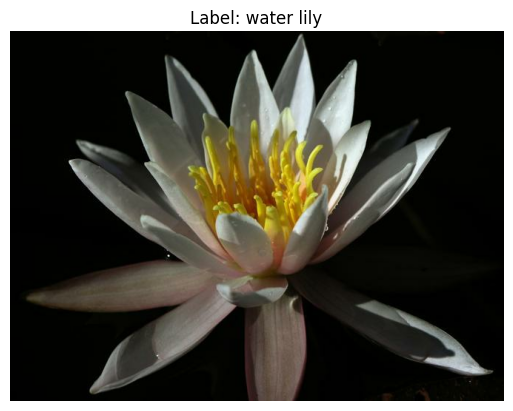

In [6]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 
class_names_labels = dataset_info.features['label'].names

for image, label in train_dataset.take(1):
    # Convert the label to its corresponding class name
    label_name = class_names_labels[label.numpy()]

    # Plot the image
    plt.imshow(image)
    plt.title(f"Label: {label_name}")
    plt.axis('off')  # Hide axes for better visualization
    plt.show()


### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [7]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

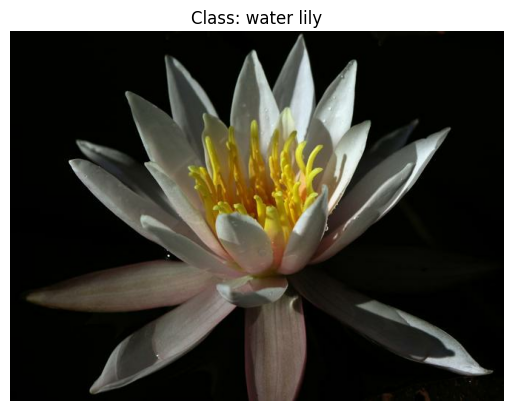

In [8]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 
for image, label in train_dataset.take(1):
    # Convert the label to its corresponding class name using the label_map
    label_name = class_names[str(label.numpy())]  # Ensure label is in string format for lookup

    # Plot the image
    plt.imshow(image)
    plt.title(f"Class: {label_name}")
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

## Create Pipeline

In [9]:
# TODO: Create a pipeline for each set.
def preprocess_image(image, label):
    image = tf.image.resize(image, [128, 128])
    image = image / 255.0
    return image, label

def create_pipeline(dataset, batch_size, shuffle=False):
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)  # Shuffle buffer size can be adjusted
    dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

BATCH_SIZE = 32

train_dataset = create_pipeline(dataset['train'], batch_size=BATCH_SIZE, shuffle=True)
val_dataset = create_pipeline(dataset['validation'], batch_size=BATCH_SIZE)
test_dataset = create_pipeline(dataset['test'], batch_size=BATCH_SIZE)

for images, labels in train_dataset.take(1):
    print(f"Batch image shape: {images.shape}")
    print(f"Batch label shape: {labels.shape}")

Batch image shape: (32, 128, 128, 3)
Batch label shape: (32,)


# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [10]:
# TODO: Build and train your network.

module_handle = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
feature_extractor = hub.KerasLayer(module_handle, input_shape=(224, 224, 3))

# Freeze the MobileNetV2 feature extractor
feature_extractor.trainable = False

def build_model(num_classes):
    inputs = tf.keras.Input(shape=(128, 128, 3))  # Use the shape from your dataset preprocessing
    x = tf.image.resize(inputs, [224, 224])  # Resize to MobileNetV2 input size
    x = feature_extractor(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Define number of classes from the dataset info
num_classes = len(class_names)

# Build the model
model = build_model(num_classes)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    verbose=1
)

Epoch 1/10
32/32 [==============================] - 123s 4s/step - loss: 3.7366 - accuracy: 0.2363 - val_loss: 2.0685 - val_accuracy: 0.5176
Epoch 2/10
32/32 [==============================] - 113s 4s/step - loss: 0.8809 - accuracy: 0.8039 - val_loss: 1.3680 - val_accuracy: 0.6441
Epoch 3/10
32/32 [==============================] - 115s 4s/step - loss: 0.2785 - accuracy: 0.9373 - val_loss: 1.1438 - val_accuracy: 0.6853
Epoch 4/10
32/32 [==============================] - 114s 4s/step - loss: 0.1234 - accuracy: 0.9833 - val_loss: 1.0927 - val_accuracy: 0.6941
Epoch 5/10
32/32 [==============================] - 117s 4s/step - loss: 0.0443 - accuracy: 0.9990 - val_loss: 0.9519 - val_accuracy: 0.7402
Epoch 6/10
32/32 [==============================] - 119s 4s/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.9319 - val_accuracy: 0.7480
Epoch 7/10
32/32 [==============================] - 119s 4s/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.9170 - val_accuracy: 0.7471
Epoch 8/10
32

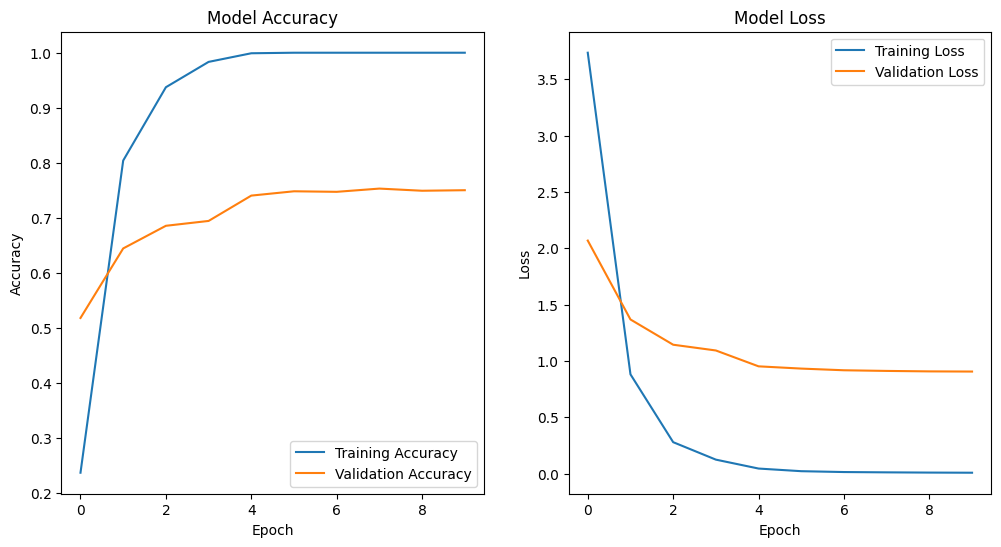

In [11]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [12]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)

# Print the results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")



193/193 [==============================] - 364s 2s/step - loss: 1.1135 - accuracy: 0.7134
Test Loss: 1.1135
Test Accuracy: 0.7134


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [13]:
# TODO: Save your trained model as a Keras model.

model.save('flower_classifier.hdf5')  # HDF5 format


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load the Keras Model

Load the Keras model you saved above.

In [14]:
# TODO: Load the Keras model
# Load the model from the file
custom_objects = {
    'KerasLayer': hub.KerasLayer
}

loaded_model = tf.keras.models.load_model('flower_classifier.hdf5', custom_objects=custom_objects)



# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [15]:
# TODO: Create the process_image function

def process_image(image):
   
    # Convert to PIL image
    image = Image.fromarray(image)
    
    # Resize to (128, 128)
    image = image.resize((128, 128))
    
    # Convert to NumPy array
    image = np.asarray(image)
    
    # Normalize the image
    image = image / 255.0
    
    return image

To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

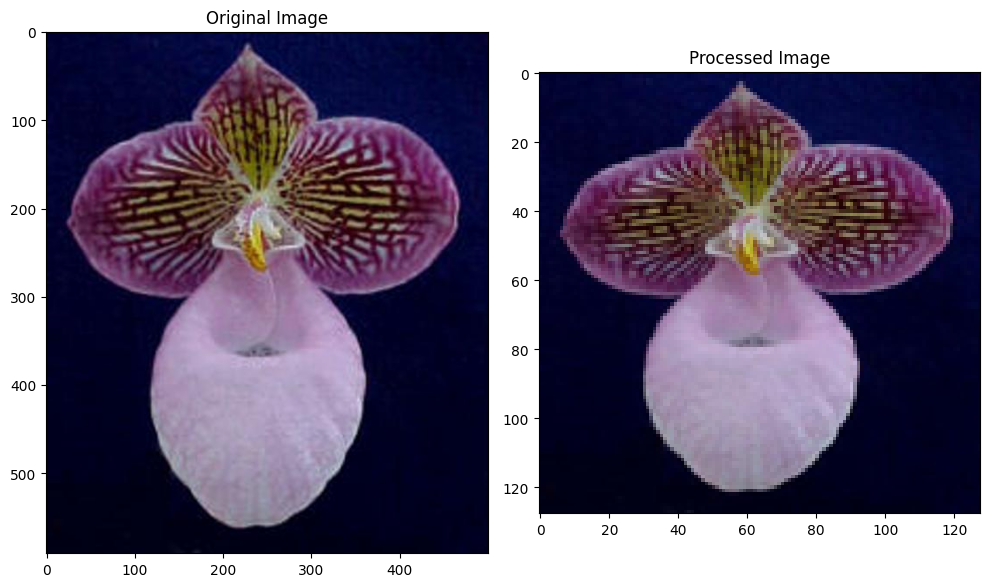

In [16]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [17]:
# TODO: Create the predict function

def predict(image_path, model, top_k=5):
  
    # Load and process the image
    image = Image.open(image_path)
    processed_image = process_image(np.asarray(image))
    
    # Expand dimensions to match the model input
    processed_image = np.expand_dims(processed_image, axis=0)
    
    # Make prediction
    predictions = model.predict(processed_image)
    
    # Get top K probabilities and class indices
    top_k_indices = np.argsort(predictions[0])[-top_k:][::-1]
    top_k_probs = predictions[0][top_k_indices]
    top_k_classes = [str(i) for i in top_k_indices]  # Adjust based on class names
    
    return top_k_probs, top_k_classes

# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

1/1 [==============================] - 0s 82ms/step


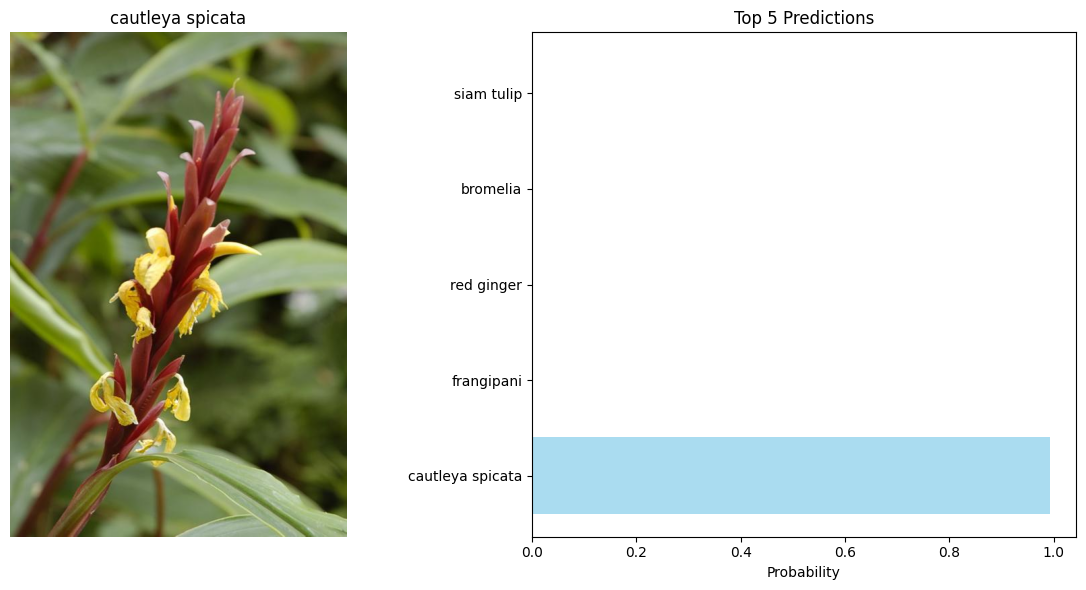

1/1 [==============================] - 0s 44ms/step


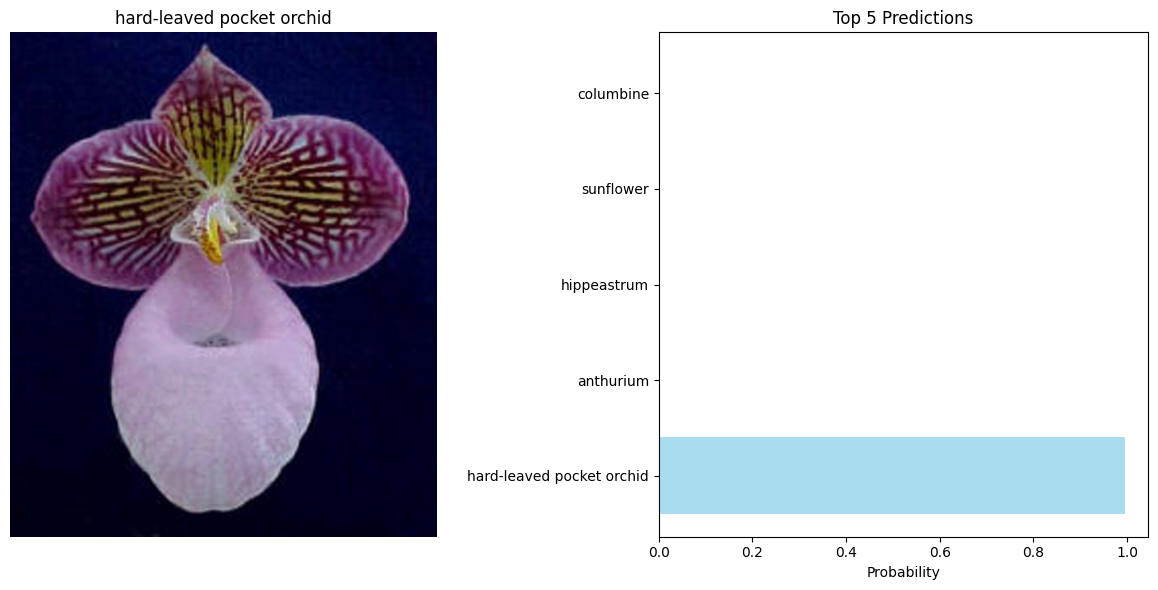

1/1 [==============================] - 0s 67ms/step


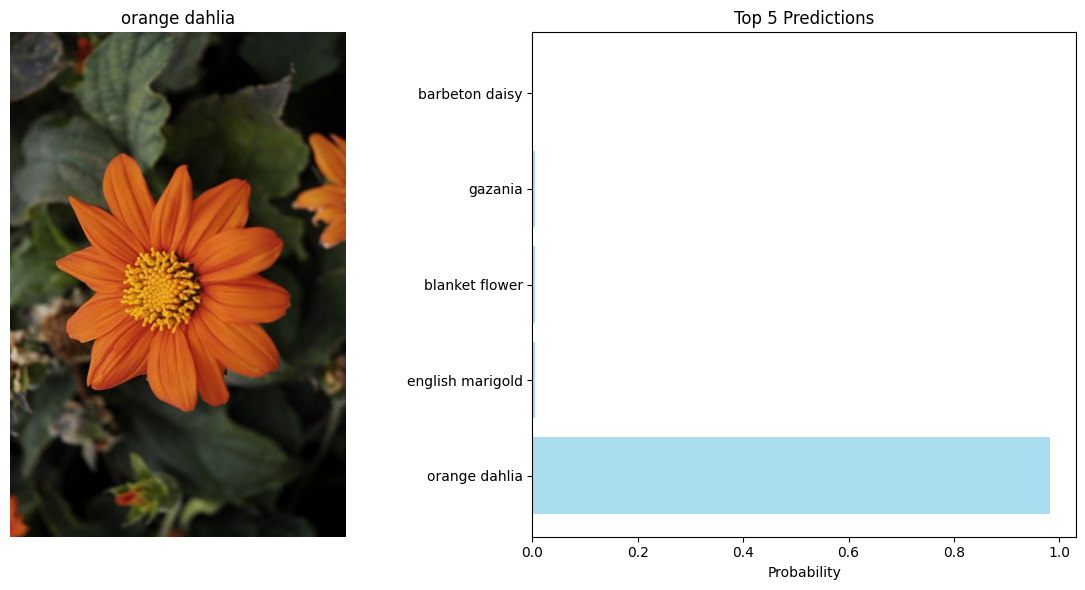

1/1 [==============================] - 0s 81ms/step


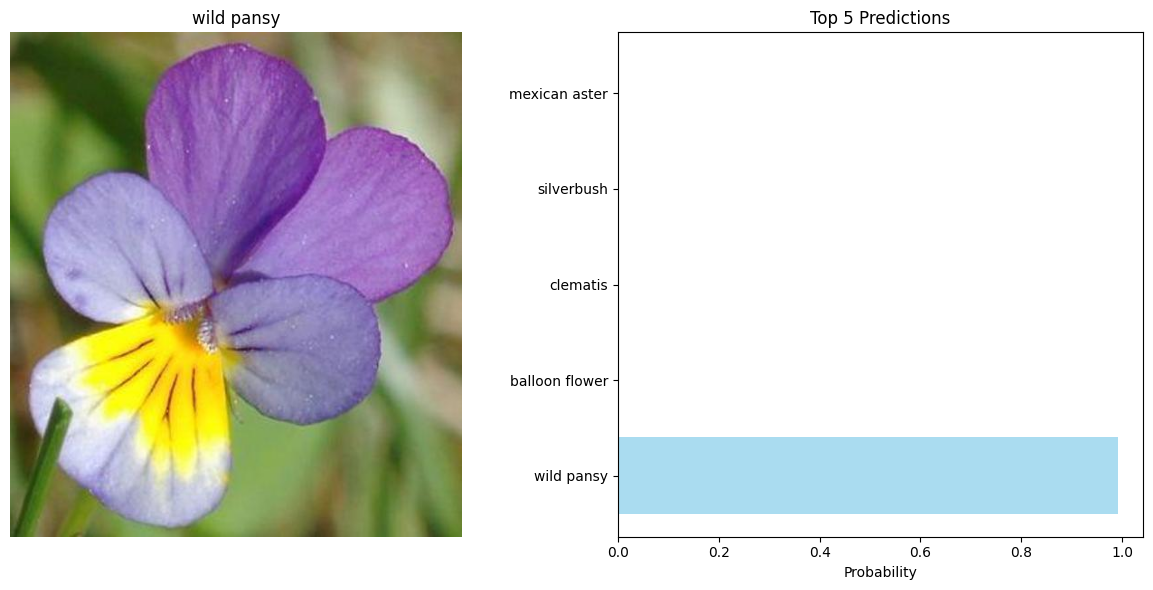

In [24]:
import json
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load class names from label_map.json
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

# TODO: Plot the input image along with the top 5 classes
def plot_image_with_predictions(image_path, model, top_k=5):
    """
    Plot the input image alongside the top K predicted classes with their probabilities.
    
    Args:
        image_path (str): The path to the image file.
        model (tf.keras.Model): The trained Keras model for prediction.
        top_k (int): The number of top class labels to display.
    """
    # Load and process the image
    image = Image.open(image_path)
    processed_image = process_image(np.asarray(image))
    
    # Make prediction
    probs, classes = predict(image_path, model, top_k)
    
    # Convert class indices to flower names
    flower_names_top_k = [class_names[str(cls)] for cls in classes]
    
    # Plot the image and predictions
    plt.figure(figsize=(12, 6))
    
    # Plot the input image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(flower_names_top_k[0])  # Set the title to the top predicted flower name
    
    # Plot the predictions
    plt.subplot(1, 2, 2)
    y_pos = np.arange(top_k)
    plt.barh(y_pos, probs, align='center', alpha=0.7, color='skyblue')
    plt.yticks(y_pos, flower_names_top_k)  # Use flower names for predictions
    plt.xlabel('Probability')
    plt.title('Top 5 Predictions')
    
    plt.tight_layout()
    plt.show()

# Plot for each test image
test_images_folder = './test_images/'
test_image_files = [
    'cautleya_spicata.jpg',
    'hard-leaved_pocket_orchid.jpg',
    'orange_dahlia.jpg',
    'wild_pansy.jpg'
]

for image_file in test_image_files:
    image_path = os.path.join(test_images_folder, image_file)
    plot_image_with_predictions(image_path, model, top_k=5)
